<a href="https://colab.research.google.com/github/savindumahasen/MRI-Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [2]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.13GB/s]

In [4]:
## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [5]:
## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

In [6]:
## split the train set into train set and  validation set

## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)
validation_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           subset='validation',
                                                           validation_split=0.1,
                                                           seed=42
                                                           )

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Found 5712 files belonging to 4 classes.
Using 571 files for validation.


In [7]:
## Load the test set

test_set=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           )

Found 1311 files belonging to 4 classes.


In [8]:
## Get the target values

In [9]:
class_names=train_set.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [10]:
## Look at the one batch

In [11]:
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


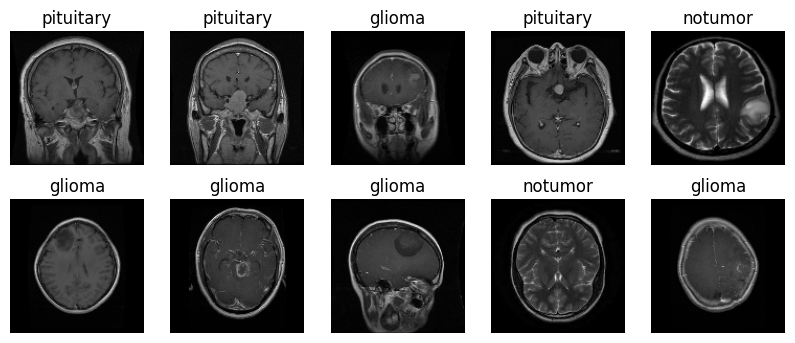

In [12]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [13]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.5  0.5  0.5 ]
   ...
   [0.5  0.5  0.5 ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [1.   1.   1.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  ...

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [1.5  1.5  1.5 ]
   ...
   [5.25 5.25 5.25]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.75 0.75 0.75]
   ...
   [0.5  0.5  0.5 ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.5  0.5  0.5 ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0

In [14]:
train_data=train_set.map(lambda x,y:(x/255,y))
validation_data=validation_set.map(lambda x,y:(x/255,y))
test_data=test_set.map(lambda x,y:(x/255,y))

In [15]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [3.   3.   3.  ]
   ...
   [0.   0.   0.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  ...

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [1.5  1.5  1.5 ]
   ...
   [2.   2.   2.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0

In [16]:
## Data Augmentation

In [17]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
## Build the CNN model

model=tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,924 (12.69 MB)

 Trainable params: 3,325,668 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [23]:
## Complite the model


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
## train the CNN architecture model

In [24]:
start_time=time.time()
history=model.fit(train_set,validation_data=validation_set, epochs=10)
end_time=time.time()

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 148s 903ms/step - accuracy: 0.5758 - loss: 1.1030 - val_accuracy: 0.3170 - val_loss: 4.7403
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 877ms/step - accuracy: 0.7122 - loss: 0.7460 - val_accuracy: 0.7005 - val_loss: 0.8225
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 878ms/step - accuracy: 0.7323 - loss: 0.6735 - val_accuracy: 0.4658 - val_loss: 2.0291
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 882ms/step - accuracy: 0.7611 - loss: 0.5830 - val_accuracy: 0.6095 - val_loss: 1.1616
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 876ms/step - accuracy: 0.7895 - loss: 0.5258 - val_accuracy: 0.6935 - val_loss: 0.7561
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 873ms/step - accuracy: 0.8012 - loss: 0.5047 - val_accuracy: 0.6550 - val_loss: 0.9819
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 875ms/step - accuracy: 0.8070 - loss: 0.4823 - val_accuracy: 0.8231 - val_loss: 0.4941
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 140s 872ms/step - accuracy: 0.8299 -

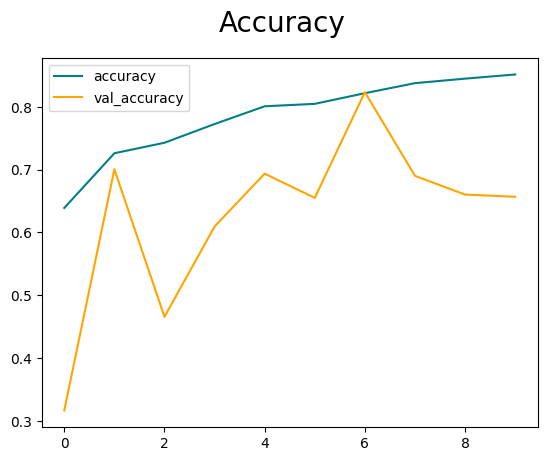

In [25]:
## plot the  accuracy  and  validation_accuracy
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

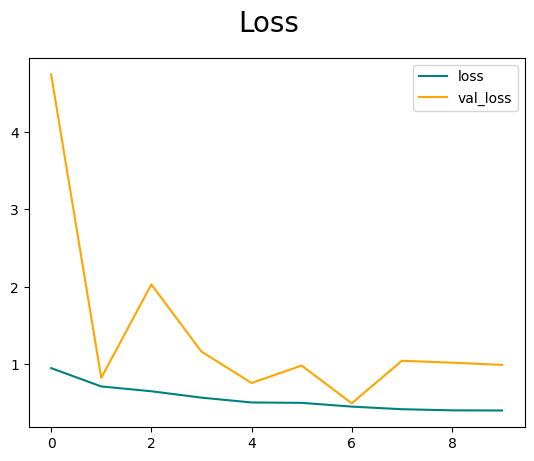

In [26]:
## plot the  loss  and  validation_loss
fig=plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [27]:
## Test the model using fresh test data

In [136]:
#test_set_dataframe=pd.DataFrame(test_set)
#test_set_dataframe

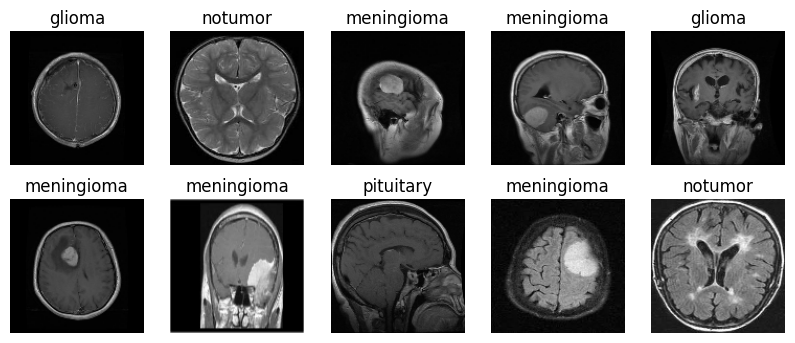

In [139]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in test_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [146]:
def test_image():
  for image,label in test_set:
    return image
test_image=test_image()
print(test_image.shape)


def test_image_label():
  for image,label in test_set:
    return label
test_label=test_image_label()
print(test_label.shape)

(32, 128, 128, 3)
(32,)


In [147]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [148]:
model_predictions_new=model.predict(test_image)
model_predictions_new.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


(32, 4)

In [153]:
for batch in test_set.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)  # (32, 4)
    yhat_classes = np.argmax(yhat, axis=1)  # (32,)

    precision.update_state(y, yhat_classes)
    recall.update_state(y,yhat_classes)
    accuracy.update_state(y,yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [155]:
precision.result(), recall.result(), accuracy.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.8400493264198303>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9980217814445496>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6216628551483154>)

In [45]:
#predictions=model.predict(X)
#predictions

In [36]:
## Evaluate the performance of the model based on th test data

In [46]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [157]:
predictions=model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [158]:
predictions[1]

array([1.1209301e-04, 2.9800814e-03, 1.3317321e-01, 8.6373454e-01],
      dtype=float32)

In [30]:
## Make the prediction based on single  value

In [159]:
predictions[1]

array([1.1209301e-04, 2.9800814e-03, 1.3317321e-01, 8.6373454e-01],
      dtype=float32)

In [160]:
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [161]:
## get the predicted class  index
import numpy  as np
predicted_index=np.argmax(predictions[1])
predicted_index

np.int64(3)

In [162]:
class_name=['glioma','meningioma','notumor', 'pituitary']
predicted_class=class_name[predicted_index]
print("Brain Tumor : ",predicted_class)

Brain Tumor :  pituitary


In [163]:
## Evaluvate model performance using all test data

In [164]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [165]:
#for batch in test_set:
 # X,y=batch
 # yhat=model.predict(X)
 # precision.update_state(y,yhat)
 # recall.update_state(y,yhat)


In [166]:
## use this model based on the user data

In [167]:
!pip install opencv-python

In [168]:
import cv2

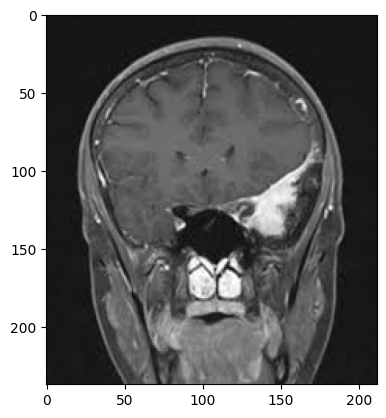

In [169]:
image=cv2.imread("/content/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0003.jpg")
plt.imshow(image)
plt.show()

In [170]:

## data preprocessing

In [171]:
resized_image=tf.image.resize(image,IMAGE_SIZE)
#scaled_image=resized_image/255

In [172]:
resized_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        ...,
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ]],

       [[22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        ...,
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ]],

       [[22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        [22.      , 22.      , 22.      ],
        ...,
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ],
        [21.      , 21.      , 21.      ]],

       ...,

       [[23.515625, 23.515625, 23.515625],
        [23.388733, 23.388733, 23.388733],
        [23.175232, 23.1752

In [173]:
#scaled_image

In [174]:
## expand the diminesion of image

In [175]:
user_image=np.expand_dims(resized_image,0).shape
user_image

(1, 128, 128, 3)

In [176]:

predictions_new=model.predict(np.expand_dims(resized_image,0))
predictions_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[9.7341508e-06, 1.8934682e-03, 9.9640840e-01, 1.6883920e-03]],
      dtype=float32)

In [177]:

## get the predicted class  index
import numpy  as np
predicted_index_new=np.argmax(predictions_new)
predicted_index_new

np.int64(2)

In [178]:

class_name=['glioma','meningeoma','notumor', 'pituitary']
predicted_class_new=class_name[predicted_index_new]
print("Brain Tumor : ",predicted_class_new)

Brain Tumor :  notumor
